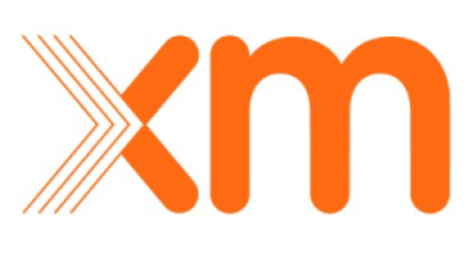

Caso de ejemplo desarrollado por el equipo de analitica de XM. 

# Objetivos de este Notebook

Si se desea conocer el proceso de instalación y consulta de variables disponibles se puede consultar a través Jupyter Notebook **Nombre del ejemplo** que se encuentra disponible en el repositorio de GitHub.  

* Explicar cómo se pueden tratar datos para los análisis 
* Explicar cómo se pueden construir gráficas con los datos


**Índice**

1. [Importación de librerías](#section1)

2. [Cálculo de la demanda mensual por región](#section2)

3. [Grafica demanda mensual](#section3)

4. [Cálculo de máximo, mínimo y promedio del precio de bolsa nacional](#section4)

5. [Grafica precio de bolsa nacional](#section5)

<a id='section1'></a>
# Importación de librerías

In [1]:
from pydataxm import *          # Importa la libreria que fue instalada con pip install pydataxm o tambien desde GitHub
import datetime as dt           # Permite trabajar con fechas 
import pandas as pd             # Manipulacion de datos
import matplotlib.pyplot as plt # Construcción de gráficas

La versión de la libreria pydataxm que se esta usando es 0.3.0 en abril del 2022

In [2]:
objetoAPI = pydataxm.ReadDB()     # Construir la clase que contiene los métodos de pydataxm

In [111]:
objetoAPI.get_collections('DemaRealNoReg') # Revisar los cruces disponibles para demanda comercial



,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
104,DemaRealNoReg,Demanda Real No Regulada Agente,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Demanda de usuarios regulados y no regulados q...
105,DemaRealNoReg,Demanda Real No Regulada Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Demanda de usuarios regulados y no regulados q...


In [116]:
df_demanda = objetoAPI.request_data('ListadoRecursos',
                                    'Sistema',
                                    dt.date(2023, 1, 1),
                                    dt.date(2023, 1, 31))

df_demanda.head(10)

C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\pydataxm\pydataxm.py:234: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\pydataxm\pydataxm.py:236: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Date'] = pd.to_datetime(data['Date'],errors='ignore', format= '%Y-%m-%d')


,Id,Values_Code,Values_Name,Values_Type,Values_Disp,Values_RecType,Values_CompanyCode,Values_EnerSource,Values_OperStartdate,Values_State,Date
0,Sistema,2QBW,EL POPAL,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ISGG,AGUA,2014-03-31,OPERACION,2024-10-19
1,Sistema,2QEK,SALTO II,HIDRAULICA,DESPACHADO CENTRALMENTE,FILO DE AGUA,ENDG,AGUA,2014-06-25,OPERACION,2024-10-19
2,Sistema,2QRL,LA REBUSCA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,GEN. DISTRIBUIDA,HZEG,AGUA,2014-07-24,OPERACION,2024-10-19
3,Sistema,2QV2,BAJO TULUA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,EPSG,AGUA,2015-01-30,OPERACION,2024-10-19
4,Sistema,2R22,LAGUNETA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ENDG,AGUA,2014-12-17,OPERACION,2024-10-19
5,Sistema,2S6Q,AUTOG YAGUARITO,TERMICA,NO DESPACHADO CENTRALMENTE,AUTOGENERADOR,EMSG,BIOGAS,2016-03-22,OPERACION,2024-10-19
6,Sistema,2S6S,AUTOG ARGOS YUMBO,TERMICA,NO DESPACHADO CENTRALMENTE,AUTOGENERADOR,EPSG,CARBON,2016-03-20,OPERACION,2024-10-19
7,Sistema,2S6U,AUTOG ARGOS EL CAIRO,HIDRAULICA,NO DESPACHADO CENTRALMENTE,AUTOGENERADOR,EPMG,AGUA,2017-09-29,OPERACION,2024-10-19
8,Sistema,2S78,LA FRISOLERA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,GEN. DISTRIBUIDA,GPYG,AGUA,2016-04-29,OPERACION,2024-10-19
9,Sistema,2S8G,AUTOG ARGOS TOLUVIEJO,TERMICA,NO DESPACHADO CENTRALMENTE,AUTOGENERADOR,EPSG,CARBON,2016-03-03,PRUEBAS,2024-10-19


<a id='section1'></a>
# Demanda Energéticas por Actividad Comercial (Exportar CSV)



In [118]:
df_demanda = objetoAPI.request_data('DemaRealNoReg',
                                    'Agente',
                                    dt.date(2023, 1, 1),
                                    dt.date(2023, 1, 31))

df_demanda.head(5)

C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\pydataxm\pydataxm.py:234: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\pydataxm\pydataxm.py:236: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Date'] = pd.to_datetime(data['Date'],errors='ignore', format= '%Y-%m-%d')


,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Agente,ASCC,813.57,761.53,750.06,742.90,762.56,827.24,762.97,965.11,...,1039.08,1050.94,1019.39,1115.59,1040.60,1007.84,938.38,877.84,807.48,2023-01-31
1,Agente,BIAC,562.22,538.95,517.72,535.61,534.05,567.79,641.80,728.11,...,694.39,773.31,831.02,758.18,798.76,760.32,749.57,582.04,529.90,2023-01-31
2,Agente,CASC,538.72,640.50,550.40,463.65,306.96,298.57,538.43,733.75,...,1481.67,1247.88,878.25,606.43,598.56,705.35,893.14,760.30,603.83,2023-01-31
3,Agente,CBNC,10325.30,10059.29,10158.71,10089.82,9880.62,9781.20,9704.63,9104.15,...,4978.05,5906.37,9568.61,10235.82,10225.10,10191.03,10039.78,10048.43,10270.49,2023-01-31
4,Agente,CDNC,8981.13,8972.82,8814.08,8826.17,8864.11,9048.14,1035.37,1115.70,...,1234.34,1372.05,1219.43,9210.07,9184.30,9061.21,8920.27,8887.40,8849.83,2023-01-31


In [96]:
objetoAPI.get_collections('DemaCome') # Revisar los cruces disponibles para demanda comercial



,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
3,DemaCome,Demanda Comercial por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...
11,DemaCome,Demanda Comercial por Agente,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Considera la demanda propia de cada comerciali...
83,DemaCome,Demanda Comercial por MercadoComercializacion,MercadoComercializacion,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...


<a id='section1'></a>
# Demanda por Comercial por Regiones (Exportar CSV)

In [103]:
df_demanda_2 = objetoAPI.request_data('DemaCome',
                                    'MercadoComercializacion',
                                    dt.date(2023, 1, 1),
                                    dt.date(2023, 1, 31))

df_demanda_2.to_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Datos_Demanda_Actividad_Comercial.csv', index=False)

C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\pydataxm\pydataxm.py:234: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\pydataxm\pydataxm.py:236: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Date'] = pd.to_datetime(data['Date'],errors='ignore', format= '%Y-%m-%d')


In [104]:
df_demanda_2.head()#Ver encabezado


,Id,Values_code,Values_MarketType,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,MercadoComercializacion,ANTIOQUIA,NO REGULADO,357068.64,356013.12,357663.07,358391.08,357000.89,363842.40,356172.10,...,378639.52,379815.89,367880.79,394888.06,394913.14,376933.56,362048.34,354690.43,349437.11,2023-01-31
1,MercadoComercializacion,ANTIOQUIA,REGULADO,638634.39,597053.15,576572.96,573037.99,629277.65,746516.85,837063.87,...,1068307.83,1052368.53,1001819.04,1033116.79,1077573.33,1019602.57,934586.31,808927.66,704686.46,2023-01-31
2,MercadoComercializacion,ARAUCA,NO REGULADO,91130.27,92005.32,91671.63,91829.47,91563.77,91408.79,90332.07,...,92053.42,91904.58,91440.45,91244.61,91632.21,91405.56,90880.80,90959.09,91363.68,2023-01-31
3,MercadoComercializacion,ARAUCA,REGULADO,31130.70,29834.69,28883.28,28195.62,28051.59,29022.40,28234.68,...,40401.76,39111.77,37380.02,40402.32,40726.34,39617.22,37954.79,34755.29,32225.20,2023-01-31
4,MercadoComercializacion,BAJO PUTUMAYO,NO REGULADO,182.30,162.07,167.84,173.02,166.09,165.61,206.52,...,333.89,327.18,316.27,296.07,253.31,212.73,215.32,226.41,212.95,2023-01-31


<a id='section2'></a>
# Cálculo de la demanda mensual por región 

Debido a que la demanda consultada esta con una granularidad horaria, a continuación se realiza el cálculo de la demanda agrupado de forma diaria, luego de forma mensual; y por último se realiza el calculo en porcentaje de la demanda por región. 

In [26]:
#df_demanda['demanda_diaria'] = df_demanda.sum(axis=1, skipna=True, numeric_only=True) #Cálculo diario de la demanda
#df_demanda = df_demanda.groupby(by=['Values_code']).sum()['demanda_diaria']           #Cálculo mensual de la demanda
#df_demanda_porcenaje = (df_demanda*100/df_demanda.sum()).round(2).sort_values(ascending=True) #cálculo del porcentaje de la demanda

# Seleccionar solo columnas numéricas antes de sumar para calcular la demanda diaria
df_demanda['demanda_diaria'] = df_demanda.select_dtypes(include='number').sum(axis=1, skipna=True)

# Agrupar por 'Values_code' y sumar la columna 'demanda_diaria'
df_demanda_mensual = df_demanda.groupby(by=['Values_code'])['demanda_diaria'].sum().sort_values(ascending=True)

# Calcular el porcentaje de la demanda mensual
df_demanda_porcenaje = (df_demanda_mensual * 100 / df_demanda_mensual.sum()).round(2).sort_values(ascending=True)



In [20]:
df_demanda_porcenaje.head()

Values_code
SIN CLASIFICAR        0.01
POPAYAN - PURACE      0.01
VALLE DEL SIBUNDOY    0.02
RUITOQUE              0.03
GUAVIARE              0.10
Name: demanda_diaria, dtype: float64

<a id='section3'></a>
# Grafica demanda mensual

Veamos mediante una visualización el porcentaje de la demanda de cada región. 

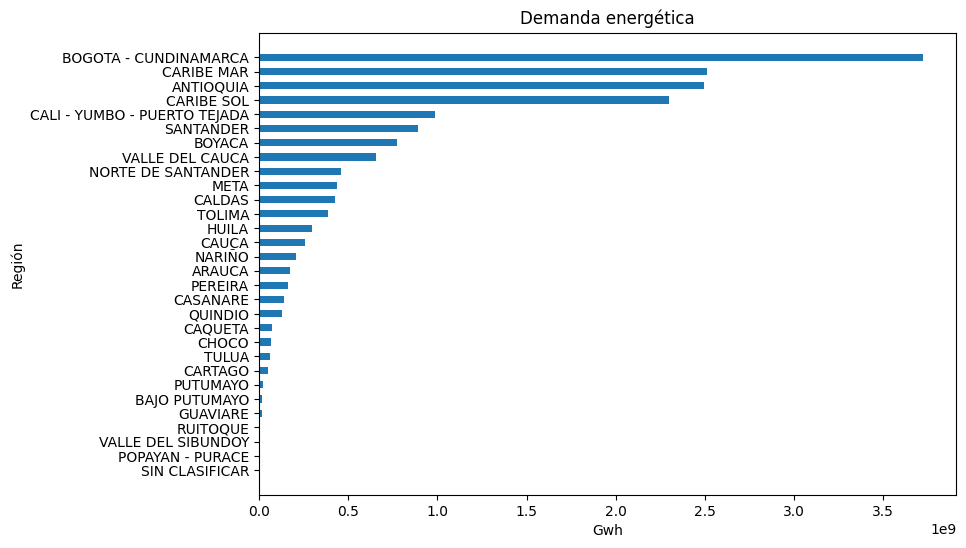

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(9,6))
ax.barh(y=df_demanda_mensual.axes[0].tolist(), width=df_demanda_mensual.values.tolist(), height=0.5)
ax.set_ylabel('Región')
ax.set_xlabel('Gwh')
plt.xticks(rotation = 0);
plt.title('Demanda energética')
plt.show()

<a id='section4'></a>
# Cálculo de máximo, mínimo y promedio del precio de bolsa nacional 

Veamos otro ejemplo calculando el máximo, mínimo y promedio diario del precio en bolsa nacional de forma diaria durante el 2021.

In [9]:
    df_precio_bolsa = objetoAPI.request_data("PrecBolsNaci", "Sistema", dt.date(2021, 1, 1), dt.date(2021, 12, 31)) #consulta de la variable precio de bolsa nacional por sistema  
    df_precio_bolsa.drop(columns=['Id', 'Values_code'], inplace=True)             #Eliminación de columnas innecesarias para los cálculos requeridos
    df_precio_bolsa.set_index('Date', inplace=True)                               #Uso de la columna de 'Date' como índice
    df_resumen_anual = df_precio_bolsa.aggregate(['mean', 'max', 'min'], axis=1)  #Cálculo del promedio, máximo y mínimo del precio de bolsa nacional

In [10]:
df_resumen_anual.head()

,mean,max,min
2021-01-01,152.351667,199.31,128.31
2021-01-02,130.054583,188.96,85.27
2021-01-03,137.785000,199.16,100.16
2021-01-04,153.240000,198.46,126.46
2021-01-05,171.200000,228.45,146.45


<a id='section5'></a>
# Grafica precio de bolsa nacional

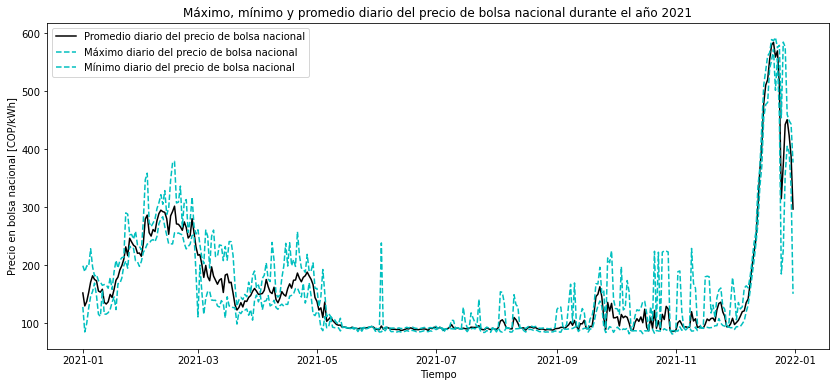

In [16]:
    fig, ax = plt.subplots(1, 1, figsize=(14,6))
    ax.plot(df_resumen_anual.index, df_resumen_anual['mean'], "k",  label='Promedio diario del precio de bolsa nacional')
    ax.plot(df_resumen_anual.index, df_resumen_anual['max'], "c--", label='Máximo diario del precio de bolsa nacional')
    ax.plot(df_resumen_anual.index, df_resumen_anual['min'], "c--", label='Mínimo diario del precio de bolsa nacional')
    ax.set_ylabel('Precio en bolsa nacional [COP/kWh]')
    ax.set_xlabel('Tiempo')
    plt.title('Máximo, mínimo y promedio diario del precio de bolsa nacional durante el año 2021')
    ax.legend()
    plt.show()